# Importing Libraries

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
print('----Libraries Loaded----')


----Libraries Loaded----


# **Changing Directory**

In [5]:
os.chdir(r'C:\Users\HP\OneDrive\Desktop\Projects\Fruit And Vegetable Recognition Project')
print("----Folder Loaded----")
os.listdir()

----Folder Loaded----


['.ipynb_checkpoints',
 'Dataset',
 'fruitAndVegetableRecognitionmodel.h5',
 'FruitAndVegetableRecognitionTesting.ipynb',
 'FruitVegetableRecognitionModel.ipynb',
 'Research Papers',
 'training_hist.json']

# **Data Pre-processing**

**Training and Validation image preprocessing**

In [9]:
training_set= tf.keras.utils.image_dataset_from_directory(
    'C:/Users/HP/OneDrive/Desktop/Projects/Fruit And Vegetable Recognition Project/Dataset/train',
    labels = "inferred",
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True
)
validation_set= tf.keras.utils.image_dataset_from_directory(
    'C:/Users/HP/OneDrive/Desktop/Projects/Fruit And Vegetable Recognition Project/Dataset/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True
)                       
print("Dataset Loaded")

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Dataset Loaded


# **Building Model**

In [10]:
cnn=tf.keras.models.Sequential()

#Adding Layers

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# adding second layer of the model
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

# adding third layer of the model
cnn.add(tf.keras.layers.Dropout(0.5))

# adding the Flatten layer
cnn.add(tf.keras.layers.Flatten())

# adding the Dense Layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling the Model
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

#Printing Summary Of Model
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0

# Trainining Model

In [11]:
with tf.device('/GPU:0'):
    training_history = cnn.fit(
        x = training_set,
        verbose=1,
        epochs=50,
        validation_data = validation_set
    )

Epoch 1/50
98/98 [==============================] - 113s 1s/step - loss: 12.5287 - accuracy: 0.0372 - val_loss: 3.5388 - val_accuracy: 0.0570
Epoch 2/50
98/98 [==============================] - 112s 1s/step - loss: 3.9322 - accuracy: 0.0485 - val_loss: 3.4556 - val_accuracy: 0.0912
Epoch 3/50
98/98 [==============================] - 122s 1s/step - loss: 3.9449 - accuracy: 0.0738 - val_loss: 3.2593 - val_accuracy: 0.1681
Epoch 4/50
98/98 [==============================] - 108s 1s/step - loss: 4.0943 - accuracy: 0.1249 - val_loss: 11.0257 - val_accuracy: 0.1054
Epoch 5/50
98/98 [==============================] - 130s 1s/step - loss: 3.4812 - accuracy: 0.1904 - val_loss: 2.6921 - val_accuracy: 0.3504
Epoch 6/50
98/98 [==============================] - 142s 1s/step - loss: 3.5336 - accuracy: 0.2385 - val_loss: 3.0065 - val_accuracy: 0.2849
Epoch 7/50
98/98 [==============================] - 132s 1s/step - loss: 3.1723 - accuracy: 0.2925 - val_loss: 2.0862 - val_accuracy: 0.5014
Epoch 8/50


In [13]:
# Saving Model
cnn.save('fruitAndVegetableRecognitionmodel.h5')
print('----Model Saved----')

----Model Saved----


In [14]:
#Saving History Of Model
import json
with open ('training_hist.json','w') as f:
  json.dump(training_history.history,f)

**Printing Accuracy of Model Achieved on Validation set**

In [15]:
print('Validation set Accuracy: {}%'.format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 94.87179517745972%


**Accuracy Visualization**

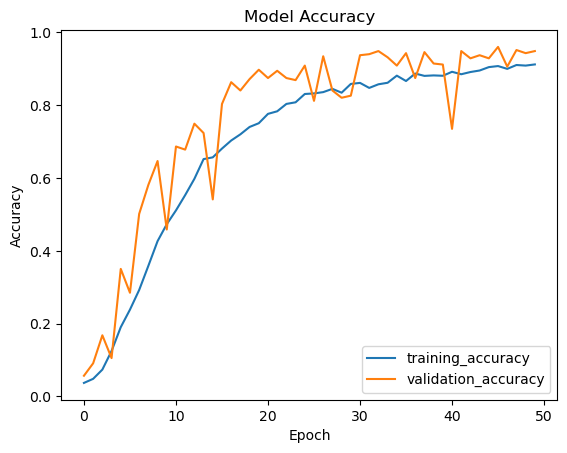

In [16]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

**Loss Visualization**

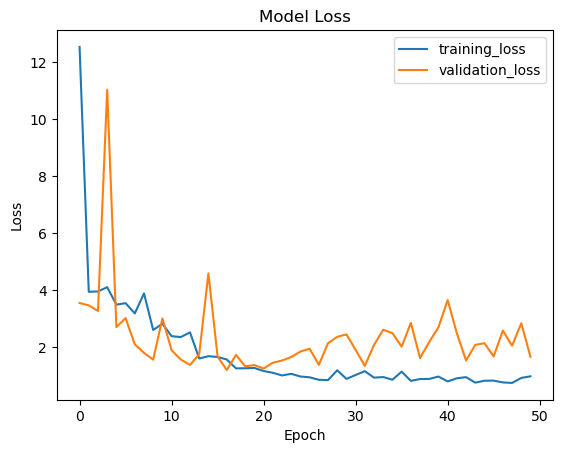

In [17]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()